train loss:2.2996618468154004
=== epoch:1, train acc:0.239, test acc:0.232 ===
train loss:2.296690005074707
train loss:2.2912080974620723
train loss:2.284710097479397
train loss:2.2748663973201215
train loss:2.2610098285037035
train loss:2.2490822884304444
train loss:2.219908187608077
train loss:2.196854976287224
train loss:2.1605110367033835
train loss:2.1292478988655694
train loss:2.0849651342729603
train loss:2.0227585057038526
train loss:1.9556959006871448
train loss:1.9212935109180302
train loss:1.7856060187662155
train loss:1.7553327406767036
train loss:1.7896237588794888
train loss:1.6236443459126844
train loss:1.4791398717085251
train loss:1.3915058078467941
train loss:1.4399504117510107
train loss:1.3345028907683574
train loss:1.170321327205844
train loss:1.1457875572764236
train loss:1.1942352637471958
train loss:1.0480420409206672
train loss:1.0610088652472631
train loss:0.9617027886059026
train loss:0.945131596107844
train loss:0.9183164924793021
train loss:0.64764252995245

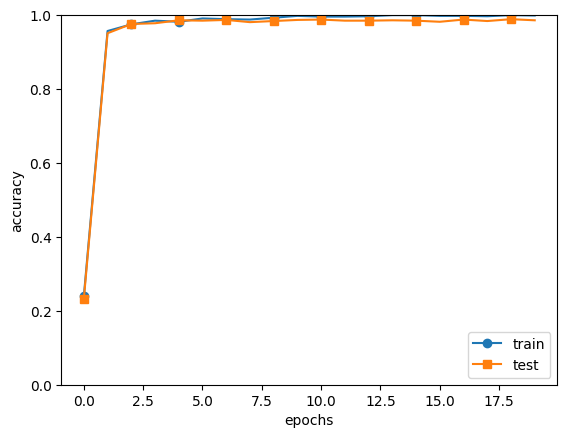

In [3]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from simple_convnet import SimpleConvNet
from common.trainer import Trainer

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 処理に時間のかかる場合はデータを削減 
#x_train, t_train = x_train[:5000], t_train[:5000]
#x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 20

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)
                        
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# パラメータの保存
network.save_params("params.pkl")
print("Saved Network Parameters!")

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()
